In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'C:/Users/AYACDA23/Downloads/leads degol1.xlsx'
df = pd.read_excel(file_path)

# Mostrar las primeras filas del dataframe
df.head()


,Date
0,2023-11-05 19:14:00
1,2023-11-05 19:33:00
2,2023-11-05 20:32:00
3,2023-11-05 20:39:00
4,2023-11-05 21:17:00


In [2]:
df.describe()

,Date
count,5899
mean,2024-04-28 13:20:54.731310080
min,2023-11-05 19:14:00
25%,2024-03-02 07:58:00
50%,2024-05-16 20:24:00
75%,2024-07-11 17:30:30
max,2024-08-28 18:27:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5899 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 46.2 KB


In [4]:
df['Hora'] = df['Date'].dt.hour
df['DiaSemana'] = df['Date'].dt.day_name()

In [5]:
# Agrupar por hora y contar la cantidad de leads
horas_recurrencia = df.groupby('Hora').size()
print(horas_recurrencia)

Hora
0     153
1      64
2      34
3      37
4      61
5     133
6     308
7     332
8     316
9     259
10    291
11    262
12    254
13    253
14    306
15    317
16    294
17    314
18    310
19    343
20    346
21    336
22    339
23    237
dtype: int64


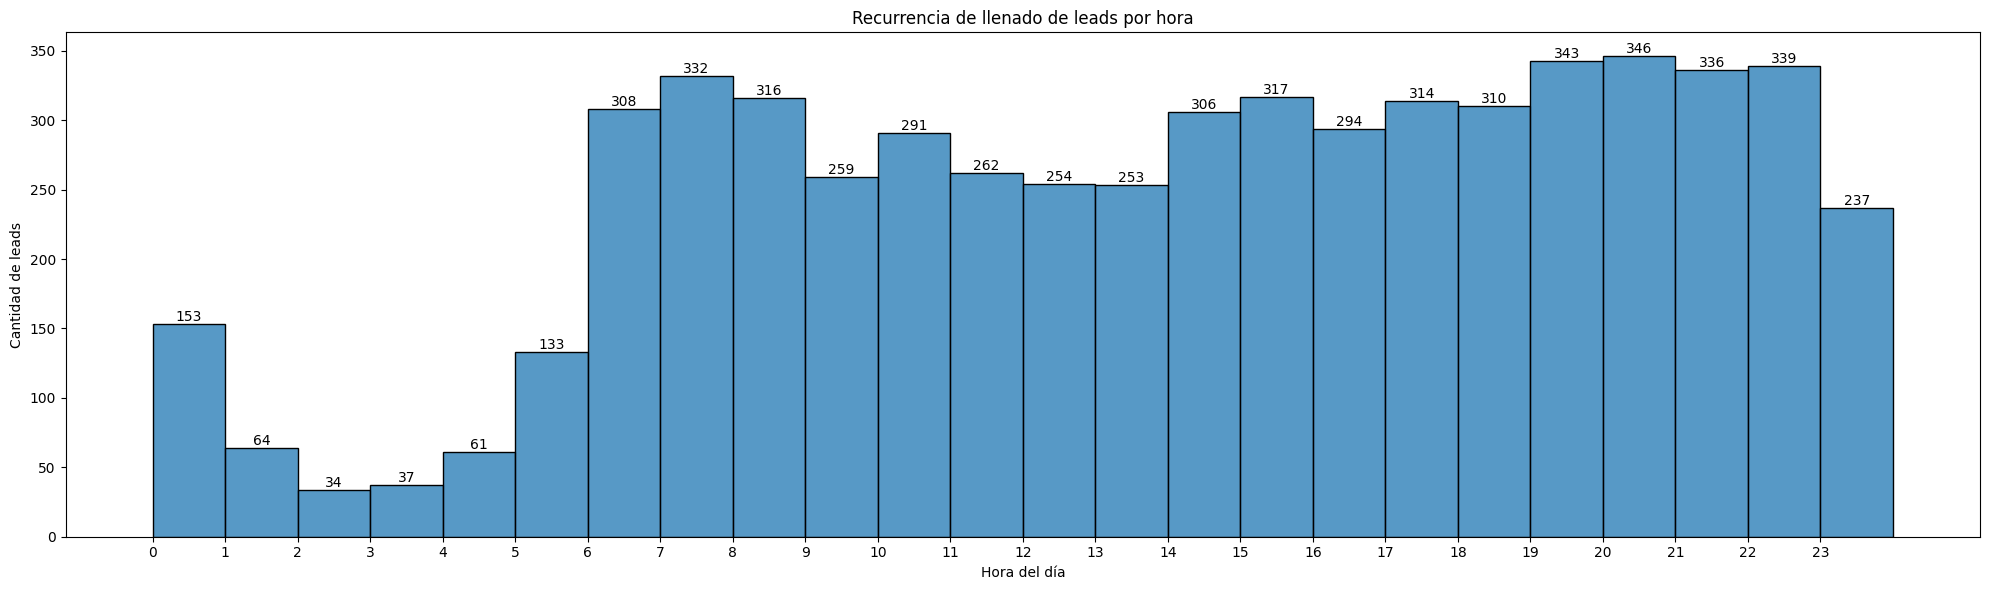

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Visualizar la recurrencia por hora
plt.figure(figsize=(20, 6))  # Ajustar el tamaño del gráfico
hist_data = sns.histplot(df, x="Hora", bins=24, kde=False, binrange=(0,24), element="bars", fill=True)

# Título y etiquetas
plt.title('Recurrencia de llenado de leads por hora')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de leads')

# Alinear las etiquetas del eje X al final de cada columna
plt.xticks(ticks=range(24), labels=[f'{h}' for h in range(24)])

# Obtener las alturas de cada barra
for rect in hist_data.patches:
    height = rect.get_height()  # La altura de cada barra
    if height > 0:  # Mostrar solo si la barra tiene algún valor
        plt.text(rect.get_x() + rect.get_width() / 2, height,   # Posición del texto
                 f'{int(height)}', ha='center', va='bottom')    # Valor del texto y alineación

# Ajustar el gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [7]:
# Agrupar por día de la semana y contar la cantidad de leads
dias_recurrencia = df.groupby('DiaSemana').size()
print(dias_recurrencia)

DiaSemana
Friday       812
Monday       826
Saturday     920
Sunday       948
Thursday     769
Tuesday      825
Wednesday    799
dtype: int64


In [8]:
# Ordenar los días de la semana
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dias_recurrencia = dias_recurrencia.reindex(orden_dias)

C:\Users\AYACDA23\AppData\Local\Temp\ipykernel_11952\383688851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=dias_recurrencia.index, y=dias_recurrencia.values, palette='viridis')


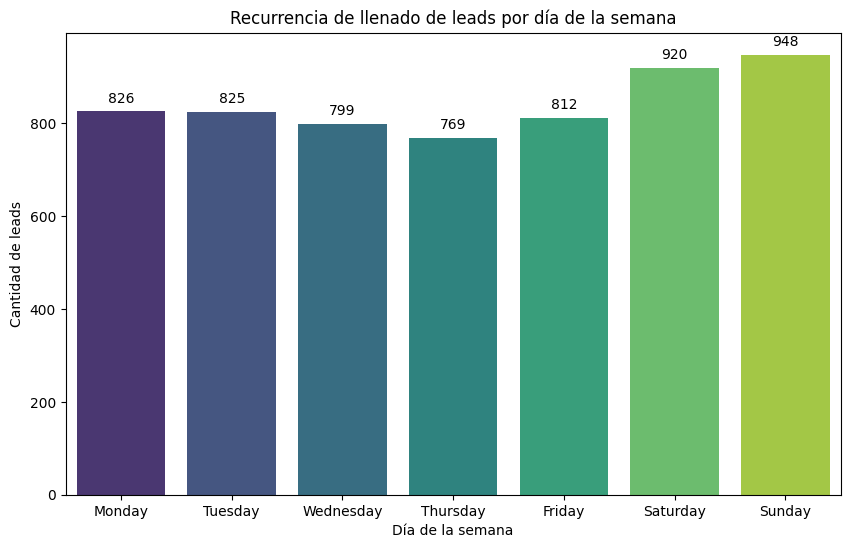

In [45]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=dias_recurrencia.index, y=dias_recurrencia.values, palette='viridis')

# Añadir etiquetas de valores encima de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # Formatear el valor como entero
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posición del texto
                ha = 'center', va = 'center', xytext = (0, 9), textcoords='offset points')  # Ajustes de la posición

# Configurar título y etiquetas de los ejes
plt.title('Recurrencia de llenado de leads por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de leads')

# Mostrar el gráfico
plt.show()